# Capstone 2 -- Supervised Learning

The subject of this capstone is the churn of customers for a bank.

## Perform imports and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'C:\\Users\\hsvjc\\Desktop\\Thinkful\\Bank Churn Data\\churn-modelling\\Churn_Modelling.csv'

df = pd.read_csv(filepath)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Description of columns

RowNumber is simply an index.
CustomerId is a unique identification of each customer in the data set.
Surname is the last name of the customer.
CreditScore is the customer's credit score.
Geography is the customer's country.
Gender is the customer's gender.
Age is the age of the customer in years.
Tenure is the length of the time for which the customer has been with the bank.
Balance is the customer's balance in the bank.
NumOfProducts is the number of bank products that the customer is using.
HasCrCard indicates whether the customer has a credit card with the bank (1) or not (0).
IsActiveMember indicates whether the customer is an active customer (1) or not (0).
EstimatedSalary is the estimated salary of the customer is US dollars.
Exited indicates whether the customer closed their account with the bank (1) or not (0).

## Identifying variables types

RowNumber, CustomerId, and Surname are not classified because these variables are used to hold information that is for identification of customers rather than any explanatory information about the customers.  Categorical variables are Geography, Gender, HasCrCard, IsActiveMember, and Exited.  All categorical variables are nominal variables that do not indicate rank-order.  Continuous variables are CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary.  All continuous variables are ratio variables that have meaningful zero points.  The continuous variables present each have the ability to be treated as categorical variables upon definition of meaningful categories.  The final decision regarding how to treat them is made after exploratory data analysis.

In [4]:
df2 = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

col_names = list(df2.columns)
var_type_series = pd.Series(index=col_names, data=col_names)
cat_var_list = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col_name in col_names:
    if col_name in cat_var_list:
        var_type_series.loc[col_name] = 'categorical'
    else:
        var_type_series.loc[col_name] = 'continuous'
var_type_series

CreditScore         continuous
Geography          categorical
Gender             categorical
Age                 continuous
Tenure              continuous
Balance             continuous
NumOfProducts       continuous
HasCrCard          categorical
IsActiveMember     categorical
EstimatedSalary     continuous
Exited             categorical
dtype: object

## Identifying missing data as well as data types for each column

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Each column is fully populated.  Only the 'Geography' and 'Gender' columns have 'object' as the listed type.  The data types present in each column are inspected.

In [6]:
for col_name in col_names:
    print(col_name)
    print(df2[col_name].apply(type).unique())

CreditScore
[<class 'int'>]
Geography
[<class 'str'>]
Gender
[<class 'str'>]
Age
[<class 'int'>]
Tenure
[<class 'int'>]
Balance
[<class 'float'>]
NumOfProducts
[<class 'int'>]
HasCrCard
[<class 'int'>]
IsActiveMember
[<class 'int'>]
EstimatedSalary
[<class 'float'>]
Exited
[<class 'int'>]


All of the columns in the DataFrame that are classified as type 'object' are shown to be composed of strings.

## Searching for duplicate entries

In [7]:
for i in range(0,df2.shape[0]):
    df2_copy = df2.copy()
    has_duplicates = True
    for col_name in col_names:
        df2_copy = df2_copy[df2_copy[col_name] == df2.iloc[i][col_name]]
        if (df2_copy.shape[0] == 1):
            has_duplicates = False
            break
    if (has_duplicates):
        print(i)

No duplicate entries are identified.

## Observing unique values of categorical variables

In [8]:
for col_name in col_names:
    if (var_type_series.loc[col_name] == 'categorical'):
        print(col_name)
        print(df2[col_name].unique())

Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
HasCrCard
[1 0]
IsActiveMember
[1 0]
Exited
[1 0]


 ## Transform 'Gender' variable to binary. 

In [9]:
df3 = df2.copy()
df3['Gender'] = df2['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df3.rename(columns={'Gender': 'IsMale'}, inplace=True)

Updating variable type list

In [10]:
col_names = list(df3.columns)
var_type_series = pd.Series(index=col_names, data=col_names)
cat_var_list = ['Geography', 'IsMale', 'HasCrCard', 'IsActiveMember', 'Exited']
for col_name in col_names:
    if col_name in cat_var_list:
        var_type_series.loc[col_name] = 'categorical'
    else:
        var_type_series.loc[col_name] = 'continuous'
var_type_series

CreditScore         continuous
Geography          categorical
IsMale             categorical
Age                 continuous
Tenure              continuous
Balance             continuous
NumOfProducts       continuous
HasCrCard          categorical
IsActiveMember     categorical
EstimatedSalary     continuous
Exited             categorical
dtype: object

In [11]:
for col_name in col_names:
    if (var_type_series.loc[col_name] == 'categorical'):
        print(col_name)
        print(df3[col_name].unique())

Geography
['France' 'Spain' 'Germany']
IsMale
[0 1]
HasCrCard
[1 0]
IsActiveMember
[1 0]
Exited
[1 0]


## Examining range of variables and reasonability

In [12]:
df3.describe()

,CreditScore,IsMale,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


'CreditScore' shows a reasonable range.  'IsMale', 'HasCrCard', 'IsActiveMember', and 'Exited' are binary variables that demonstrate the expected range of 0 to 1.  The 'Age', 'Tenure', 'Balance', 'NumOfProducts', and 'EstimatedSalary' fields show a reasonable range.

## Visualizing distributions of continuous variables

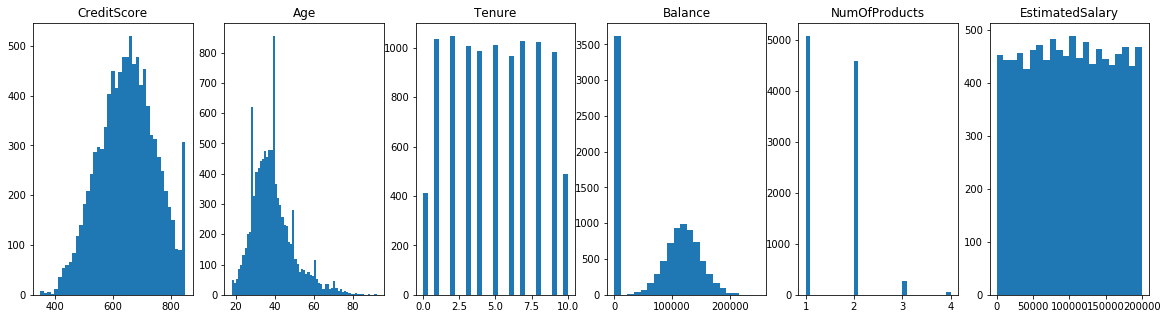

In [13]:
num_con_var = var_type_series[var_type_series == 'continuous'].shape[0]
num_hist_cols = 6
num_hist_rows = num_con_var/num_hist_cols if num_con_var%num_hist_cols == 0 else int(num_con_var/num_hist_cols) + 1

plt.figure(figsize=(20, 5))
plt.tight_layout()

i = 1
for col_name in var_type_series[var_type_series == 'continuous'].index.values:
    plt.subplot(num_hist_rows, num_hist_cols, i)
    plt.hist(df3[col_name], bins='auto')
    plt.title(col_name)
    i += 1
    
plt.show()

Visualization of the distributions of the 'Tenure' and 'NumOfProducts' fields indicates that they might be better classified as categorical variables.  A check is run to see the number of unique values in each field.

In [14]:
print('Tenure')
print(df3['Tenure'].unique())
print('NumOfProducts')
print(df3['NumOfProducts'].unique())

Tenure
[ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts
[1 3 2 4]


The number of unique options in each of these fields is not prohibitive for the purpose of converting the variables to categorical variables.  The choice to do so is deferred until later in the process because the usefulness of having a certain variable is related to the type of model chosen.

The 'CreditScore' and 'Age' variables have a normal-like appearance.  The 'Balance' variable has a strong appearance of normality in the absence of its concentration of observations near zero.  The 'EstimatedSalary' field appears to have relatively low variance.

## Testing for outliers

Statistical test for normality is applied to each continuous variable.

Square root transformation is applied to each variable.  Log, inverse, and Box-Cox transformations are applied to each continuous variable whose minimum value is greater than 0.

Z-scores are obtained for the original distributions as well as the transformed distributions for each continuous variable.

The code is not included in this presentation but can be observed in the original Jupyter Notebook.

In [15]:
from scipy.stats import zscore
from scipy.stats import normaltest
from scipy.stats import boxcox

for col_name in var_type_series[var_type_series == 'continuous'].index.values:
    series = df3[col_name]
    
    print(col_name + '\n')
    
    norm_test = normaltest(series)
    print('Probability of distribution being normal:  ' + str(norm_test[1]))
    zscore_calc = zscore(series)
    print('max z-score of distribution as is:  ' + str(zscore_calc.max()))
    print('min z-score of distribution as is:  ' + str(zscore_calc.min()) + '\n')
    
    sqr_trans = series ** 0.5
    norm_test = normaltest(sqr_trans)
    print('Probability of square root transformation distribution being normal:  ' + str(norm_test[1]))
    zscore_calc = zscore(sqr_trans)
    print('max z-score of sqaure root transformation distribution:  ' + str(zscore_calc.max()))
    print('min z-score of sqaure root transformation distribution:  ' + str(zscore_calc.min()) + '\n')
    
    if (series.min() > 0):
    
        log_trans = np.log(series)
        norm_test = normaltest(log_trans)
        print('Probability of log transformation distribution being normal:  ' + str(norm_test[1]))
        zscore_calc = zscore(log_trans)
        print('max z-score of log transformation distribution:  ' + str(zscore_calc.max()))
        print('min z-score of log transformation distribution:  ' + str(zscore_calc.min()) + '\n')
    
        inv_trans = 1/series
        norm_test = normaltest(inv_trans)
        print('Probability of inverse transformation distribution being normal:  ' + str(norm_test[1]))
        zscore_calc = zscore(inv_trans)
        print('max z-score of inverse transformation distribution:  ' + str(zscore_calc.max()))
        print('min z-score of inverse transformation distribution:  ' + str(zscore_calc.min()) + '\n')
    
        BC_trans = boxcox(series)[0]
        norm_test = normaltest(BC_trans)
        print('Probability of Box Cox transformation distribution being normal:  ' + str(norm_test[1]))
        zscore_calc = zscore(BC_trans)
        print('max z-score of Box Cox transformation distribution:  ' + str(zscore_calc.max()))
        print('min z-score of Box Cox transformation distribution:  ' + str(zscore_calc.min()) + '\n')

CreditScore

Probability of distribution being normal:  1.434445056038405e-29
max z-score of distribution as is:  2.063883767202561
min z-score of distribution as is:  -3.1095040882937757

Probability of square root transformation distribution being normal:  7.5995053448193976e-34
max z-score of sqaure root transformation distribution:  1.9419429364995904
min z-score of sqaure root transformation distribution:  -3.509374566940577

Probability of log transformation distribution being normal:  7.269540112014837e-69
max z-score of log transformation distribution:  1.8209385915625165
min z-score of log transformation distribution:  -3.9720804273074215

Probability of inverse transformation distribution being normal:  2.080630685506444e-263
max z-score of inverse transformation distribution:  5.118145369454497
min z-score of inverse transformation distribution:  -1.584078279122033

Probability of Box Cox transformation distribution being normal:  2.447974547204177e-31
max z-score of Box Cox

None of the continuous variables or transformations of them can be demonstrated to be normally distributed.  However, the transformation of the 'Age' (inverse) allows mitigation of the effects of more extreme values.  This transformation will be retained for potential use wherein the feature is not further used in engineered features.  In the event of potential use of the feature in engineered features, the original form of the variable is retained in the data set.

In [16]:
df4 = df3.copy()
df4['Age_Inv'] = 1/(df4['Age'])

df4.head()

,CreditScore,Geography,IsMale,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.023810
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0.023810
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.023256


In [17]:
col_names = list(df4.columns)
var_type_series = pd.Series(index=col_names, data=col_names)
cat_var_list = ['Geography', 'IsMale', 'HasCrCard', 'IsActiveMember', 'Exited']
for col_name in col_names:
    if col_name in cat_var_list:
        var_type_series.loc[col_name] = 'categorical'
    else:
        var_type_series.loc[col_name] = 'continuous'
var_type_series

CreditScore         continuous
Geography          categorical
IsMale             categorical
Age                 continuous
Tenure              continuous
Balance             continuous
NumOfProducts       continuous
HasCrCard          categorical
IsActiveMember     categorical
EstimatedSalary     continuous
Exited             categorical
Age_Inv             continuous
dtype: object

## Analyzing relationships to the target variable

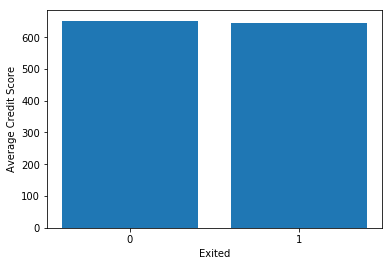

In [18]:
df4_groupby_CS = df4.groupby(['Exited'])['CreditScore'].mean()
plt.bar(['0', '1'], df4_groupby_CS), plt.xlabel('Exited'), plt.ylabel('Average Credit Score')
plt.show()

In [19]:
from scipy.stats import ttest_ind
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['CreditScore'], df4[df4['Exited'] == 0]['CreditScore'])
if (results_ttest[1] < 0.05):
    print('The credit score is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The credit score is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The credit score is shown to have a statistically significant effect on whether the customer exited.


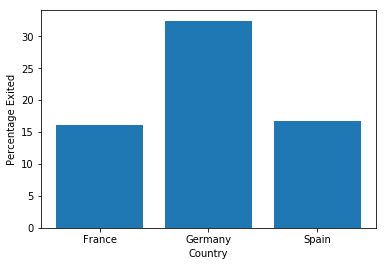

In [20]:
df4_groupby_geo = df4.groupby(['Geography'])['Exited'].mean()
plt.bar(df4_groupby_geo.index, df4_groupby_geo*100), plt.xlabel('Country'), plt.ylabel('Percentage Exited')
plt.show()

In [21]:
print('t-test:')
geo_list = df4_groupby_geo.index.values
for i in range(0,len(geo_list) - 1):
    for j in range(i+1, len(geo_list)):
        results_ttest = ttest_ind(df4[df4['Geography'] == geo_list[i]]['Exited'], df4[df4['Geography'] == geo_list[j]]['Exited'])
        if (results_ttest[1] < 0.05):
            print('There is a statistically significant difference between whether people from ' + geo_list[i] + ' and ' + 
                 geo_list[j] + ' close their accounts.')
        else:
            print('There is a not statistically significant difference between whether people from ' + geo_list[i] + ' and ' + 
                 geo_list[j] + ' close their accounts.')

t-test:
There is a statistically significant difference between whether people from France and Germany close their accounts.
There is a not statistically significant difference between whether people from France and Spain close their accounts.
There is a statistically significant difference between whether people from Germany and Spain close their accounts.


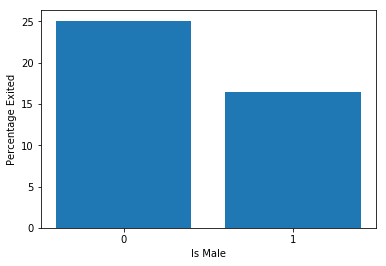

In [22]:
df4_groupby_male = df4.groupby(['IsMale'])['Exited'].mean()
plt.bar(['0', '1'], df4_groupby_male*100), plt.xlabel('Is Male'), plt.ylabel('Percentage Exited')
plt.show()

In [23]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['IsMale'] == 1]['Exited'], df4[df4['IsMale'] == 0]['Exited'])
if (results_ttest[1] < 0.05):
    print('The gender is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The gender is not shown to have a statistically significant effect on whether the customer exited.')  
print('Chi-squared test:')
from scipy.stats import chi2_contingency
results_chi2 = chi2_contingency(pd.crosstab(df4['IsMale'], df4['Exited']))
if (results_chi2[1] < 0.05):
    print('The gender is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The gender is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The gender is shown to have a statistically significant effect on whether the customer exited.
Chi-squared test:
The gender is shown to have a statistically significant effect on whether the customer exited.


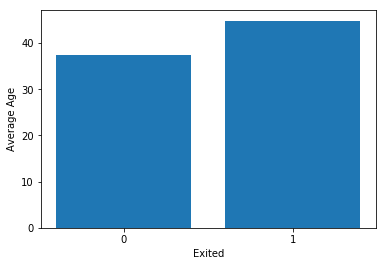

In [24]:
df4_groupby_age = df4.groupby(['Exited'])['Age'].mean()
plt.bar(['0', '1'], df4_groupby_age), plt.xlabel('Exited'), plt.ylabel('Average Age')
plt.show()

In [25]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['Age'], df4[df4['Exited'] == 0]['Age'])
if (results_ttest[1] < 0.05):
    print('The age is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The age is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The age is shown to have a statistically significant effect on whether the customer exited.


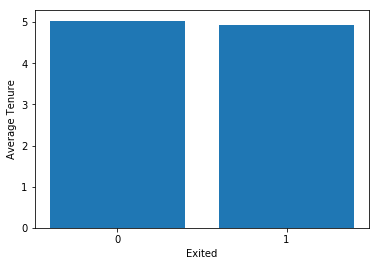

In [26]:
df4_groupby_tenure = df4.groupby(['Exited'])['Tenure'].mean()
plt.bar(['0', '1'], df4_groupby_tenure), plt.xlabel('Exited'), plt.ylabel('Average Tenure')
plt.show()

In [27]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['Tenure'], df4[df4['Exited'] == 0]['Tenure'])
if (results_ttest[1] < 0.05):
    print('The tenure is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The tenure is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The tenure is not shown to have a statistically significant effect on whether the customer exited.


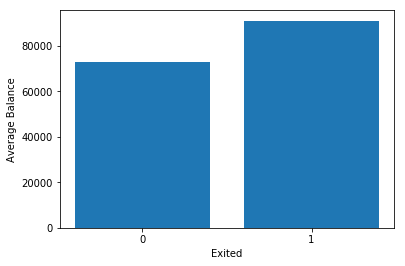

In [28]:
df4_groupby_balance = df4.groupby(['Exited'])['Balance'].mean()
plt.bar(['0', '1'], df4_groupby_balance), plt.xlabel('Exited'), plt.ylabel('Average Balance')
plt.show()

In [29]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['Balance'], df4[df4['Exited'] == 0]['Balance'])
if (results_ttest[1] < 0.05):
    print('The balance is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The balance is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The balance is shown to have a statistically significant effect on whether the customer exited.


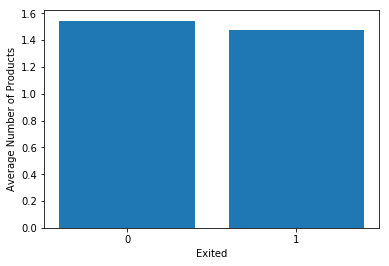

In [30]:
df4_groupby_numprod = df4.groupby(['Exited'])['NumOfProducts'].mean()
plt.bar(['0', '1'], df4_groupby_numprod), plt.xlabel('Exited'), plt.ylabel('Average Number of Products')
plt.show()

In [31]:
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['NumOfProducts'], df4[df4['Exited'] == 0]['NumOfProducts'])
print('t-test:')
if (results_ttest[1] < 0.05):
    print('The number of products is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The number of products is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The number of products is shown to have a statistically significant effect on whether the customer exited.


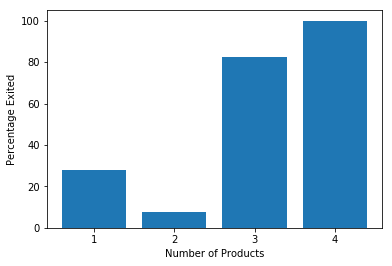

In [32]:
df4_groupby_numprod_cat = df4.groupby(['NumOfProducts'])['Exited'].mean()
plt.bar(['1', '2', '3', '4'], df4_groupby_numprod_cat*100), plt.xlabel('Number of Products'), plt.ylabel('Percentage Exited')
plt.show()

In [33]:
print('t-test:')
numprod_list = df4_groupby_numprod_cat.index.values
for i in range(0,len(numprod_list) - 1):
    for j in range(i+1, len(numprod_list)):
        results_ttest = ttest_ind(df4[df4['NumOfProducts'] == numprod_list[i]]['Exited'], 
                                  df4[df4['NumOfProducts'] == numprod_list[j]]['Exited'])
        if (results_ttest[1] < 0.05):
            print('There is a statistically significant difference between whether people with ' + str(numprod_list[i]) + ' and ' + 
                 str(numprod_list[j]) + ' products close their accounts.')
        else:
            print('There is a not statistically significant difference between whether people with ' + str(numprod_list[i]) 
                  + ' and ' + str(numprod_list[j]) + ' products close their accounts.')

t-test:
There is a statistically significant difference between whether people with 1 and 2 products close their accounts.
There is a statistically significant difference between whether people with 1 and 3 products close their accounts.
There is a statistically significant difference between whether people with 1 and 4 products close their accounts.
There is a statistically significant difference between whether people with 2 and 3 products close their accounts.
There is a statistically significant difference between whether people with 2 and 4 products close their accounts.
There is a statistically significant difference between whether people with 3 and 4 products close their accounts.


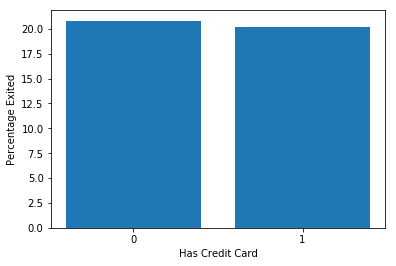

In [34]:
df4_groupby_CC = df4.groupby(['HasCrCard'])['Exited'].mean()
plt.bar(['0', '1'], df4_groupby_CC*100), plt.xlabel('Has Credit Card'), plt.ylabel('Percentage Exited')
plt.show()

In [35]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['HasCrCard'] == 1]['Exited'], df4[df4['HasCrCard'] == 0]['Exited'])
if (results_ttest[1] < 0.05):
    print('Having a credit card with the bank is shown to have a statistically significant' + 
          ' effect on whether the customer exited.')
else:
    print('Having a credit card with the bank is not shown to have a statistically significant' + 
          ' effect on whether the customer exited.')
print('Chi-squared test:')
results_chi2 = chi2_contingency(pd.crosstab(df4['HasCrCard'], df4['Exited']))
if (results_chi2[1] < 0.05):
    print('Having a credit card with bank is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('Having a credit card with bank is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
Having a credit card with the bank is not shown to have a statistically significant effect on whether the customer exited.
Chi-squared test:
Having a credit card with bank is not shown to have a statistically significant effect on whether the customer exited.


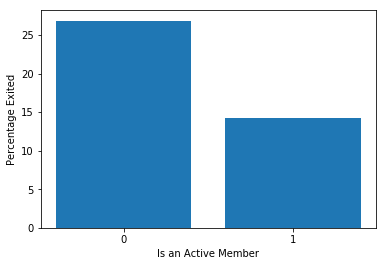

In [36]:
df4_groupby_active = df4.groupby(['IsActiveMember'])['Exited'].mean()
plt.bar(['0', '1'], df4_groupby_active*100), plt.xlabel('Is an Active Member'), plt.ylabel('Percentage Exited')
plt.show()

In [37]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['IsActiveMember'] == 1]['Exited'], df4[df4['IsActiveMember'] == 0]['Exited'])
if (results_ttest[1] < 0.05):
    print('Being an active member is shown to have a statistically significant' + 
          ' effect on whether the customer exited.')
else:
    print('Being an active member is not shown to have a statistically significant' + 
          ' effect on whether the customer exited.') 
print('Chi-squared test:')
results_chi2 = chi2_contingency(pd.crosstab(df4['IsActiveMember'], df4['Exited']))
if (results_chi2[1] < 0.05):
    print('Being an active member is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('Being an active member is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
Being an active member is shown to have a statistically significant effect on whether the customer exited.
Chi-squared test:
Being an active member is shown to have a statistically significant effect on whether the customer exited.


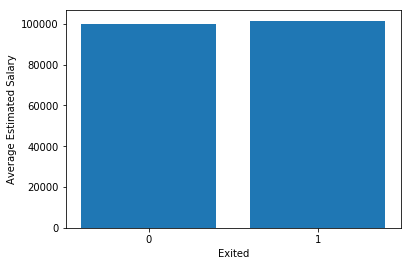

In [38]:
df4_groupby_salary = df4.groupby(['Exited'])['EstimatedSalary'].mean()
plt.bar(['0', '1'], df4_groupby_salary), plt.xlabel('Exited'), plt.ylabel('Average Estimated Salary')
plt.show()

In [39]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['EstimatedSalary'], df4[df4['Exited'] == 0]['EstimatedSalary'])
if (results_ttest[1] < 0.05):
    print('The estimated salary is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The estimated salary is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The estimated salary is not shown to have a statistically significant effect on whether the customer exited.


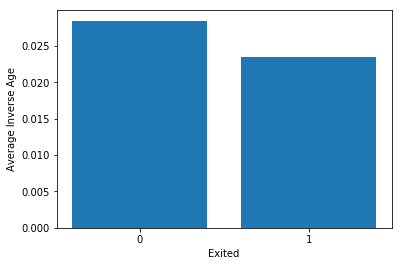

In [40]:
df4_groupby_invage = df4.groupby(['Exited'])['Age_Inv'].mean()
plt.bar(['0', '1'], df4_groupby_invage), plt.xlabel('Exited'), plt.ylabel('Average Inverse Age')
plt.show()

In [41]:
print('t-test:')
results_ttest = ttest_ind(df4[df4['Exited'] == 1]['Age_Inv'], df4[df4['Exited'] == 0]['Age_Inv'])
if (results_ttest[1] < 0.05):
    print('The inverse age is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The inverse age is not shown to have a statistically significant effect on whether the customer exited.')

t-test:
The inverse age is shown to have a statistically significant effect on whether the customer exited.


## Examining potential interaction of 'Balance' and 'EstimatedSalary'

In [42]:
print('The number of accounts with balances of 0 is ' + str(df4[df4['Balance'] == 0].shape[0]) + '.')
print('The number of accounts with estimated salaries of 0 is ' + str(df4[df4['EstimatedSalary'] == 0].shape[0]) + '.')

The number of accounts with balances of 0 is 3617.
The number of accounts with estimated salaries of 0 is 0.


Since there are no accounts that have estimated salaries of 0, 'EstimatedSalary' is used as the numerator in the potential interaction variable for 'EstimatedSalary' and 'Balance'.

In [43]:
df5 = df4.copy()
df5['Balance/Salary Ratio'] = df5['Balance']/df5['EstimatedSalary']
df5.head()

,CreditScore,Geography,IsMale,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv,Balance/Salary Ratio
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.023810,0.000000
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.024390,0.744677
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0.023810,1.401375
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.025641,0.000000
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.023256,1.587055


Visualizing distribution of 'Balance/Salary Ratio'.

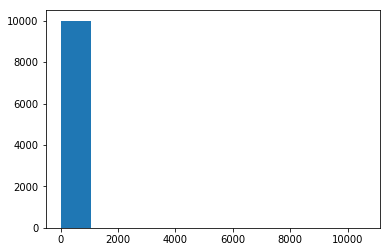

In [44]:
plt.hist(df5['Balance/Salary Ratio'], bins=10)
plt.show()

In [45]:
print(df5['Balance/Salary Ratio'].min())
print(df5['Balance/Salary Ratio'].max())

0.0
10614.655440414508


'Balance/Salary Ratio' does not demonstrate a normal distribution based on visual inspection.  This is tested formally along with distributions resulting from various transformations.

In [46]:
zscore_calc = zscore(df5['Balance/Salary Ratio'])
print('max z-score of distribution as is:  ' + str(zscore_calc.max()))
print('min z-score of distribution as is:  ' + str(zscore_calc.min()))
norm_test = normaltest(df5['Balance/Salary Ratio'])
print('Probability of distribution being normal:  ' + str(norm_test[1]))
zscore_calc = zscore((df5['Balance/Salary Ratio'])**0.5)
print('max z-score of distribution as is:  ' + str(zscore_calc.max()))
print('min z-score of distribution as is:  ' + str(zscore_calc.min()))
norm_test = normaltest((df5['Balance/Salary Ratio'])**0.5)
print('Probability of transformed distribution being normal:  ' + str(norm_test[1]))
zscore_calc = zscore((df5['Balance/Salary Ratio'])**0.05)
print('max z-score of distribution as is:  ' + str(zscore_calc.max()))
print('min z-score of distribution as is:  ' + str(zscore_calc.min()))
norm_test = normaltest((df5['Balance/Salary Ratio'])**0.05)
print('Probability of transformed distribution being normal:  ' + str(norm_test[1]))

max z-score of distribution as is:  97.94697917337767
min z-score of distribution as is:  -0.03580390433705983
Probability of distribution being normal:  0.0
max z-score of distribution as is:  59.28290117499166
min z-score of distribution as is:  -0.5553312082176023
Probability of transformed distribution being normal:  0.0
max z-score of distribution as is:  1.897354050939991
min z-score of distribution as is:  -1.3232615427258407
Probability of transformed distribution being normal:  0.0


None of the transformations yield a normal distribution, but raising 'Balance/Salary Ratio' to 0.05 power mitigates the existence of outliers.  This feature is added to the DataFrame and then tested for having a statistically significant impact on whether a customer closes their account or not.

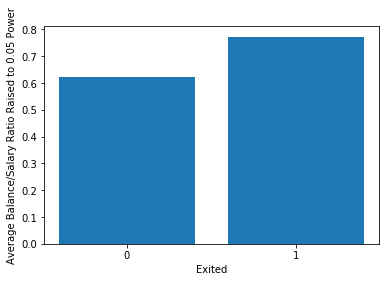

In [47]:
df5['Balance/Salary Ratio ^ 0.05'] = df5['Balance/Salary Ratio']**0.05
df5_groupby_bs_ratio_0_point_05 = df5.groupby(['Exited'])['Balance/Salary Ratio ^ 0.05'].mean()
plt.bar(['0', '1'], df5_groupby_bs_ratio_0_point_05)
plt.xlabel('Exited')
plt.ylabel('Average Balance/Salary Ratio Raised to 0.05 Power')
plt.show()

In [48]:
results_ttest = ttest_ind(df5[df5['Exited'] == 1]['Balance/Salary Ratio ^ 0.05'], 
                          df5[df5['Exited'] == 0]['Balance/Salary Ratio ^ 0.05'])

if (results_ttest[1] < 0.05):
    print('The balance/salary ratio raised to the 0.05 power is shown to have a statistically significant effect on whether the customer exited.')
else:
    print('The balance/salary ratio raised to the 0.05 power is not shown to have a statistically significant effect on whether the customer exited.')

The balance/salary ratio raised to the 0.05 power is shown to have a statistically significant effect on whether the customer exited.


## Inspecting correlation of the numeric fields

In [49]:
df_corr = df5.drop(columns=['Geography', 'Age', 'Balance/Salary Ratio']).corr()
df_corr

,CreditScore,IsMale,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv,Balance/Salary Ratio ^ 0.05
CreditScore,1.000000,-0.002857,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008301,0.008356
IsMale,-0.002857,1.000000,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.025821,0.005387
Tenure,0.000842,0.014733,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.011996,-0.015435
Balance,0.006268,0.012087,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.030306,0.927691
NumOfProducts,0.012238,-0.021859,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.027528,-0.329902
HasCrCard,-0.005458,0.005766,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010452,-0.018834
IsActiveMember,0.025651,0.022544,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.045082,-0.004135
EstimatedSalary,-0.001384,-0.008112,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.005298,-0.042944
Exited,-0.027094,-0.106512,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.283231,0.122412
Age_Inv,0.008301,0.025821,0.011996,-0.030306,0.027528,0.010452,-0.045082,0.005298,-0.283231,1.000000,-0.037279


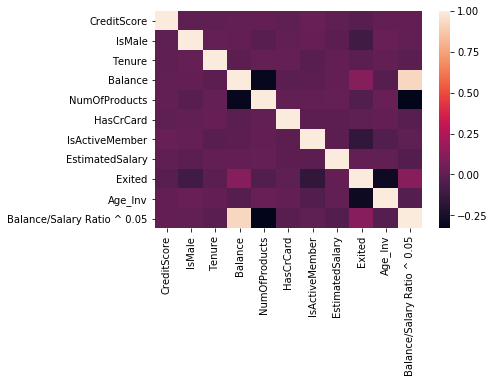

In [50]:
sns.heatmap(df_corr)
plt.show()

It is observed that the 'Balance/Salary Ratio ^ 0.05' term is highly correlated with the 'Balance' term.  Therefore, this new feature is not providing new information and should not be used.

In [51]:
df_corr['Exited'].sort_values(ascending=False)

Exited                         1.000000
Balance/Salary Ratio ^ 0.05    0.122412
Balance                        0.118533
EstimatedSalary                0.012097
HasCrCard                     -0.007138
Tenure                        -0.014001
CreditScore                   -0.027094
NumOfProducts                 -0.047820
IsMale                        -0.106512
IsActiveMember                -0.156128
Age_Inv                       -0.283231
Name: Exited, dtype: float64

Inspection of the correlation of the numeric explanatory variables with the target variable shows that the explanatory variables are weakly correlated with whether a customer closes his or her account or not.

## Removing unnecessary columns

In [52]:
df6 = df5.drop(columns=['Balance/Salary Ratio ^ 0.05', 'Age', 'Balance/Salary Ratio'])
df6.head()

,CreditScore,Geography,IsMale,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv
0,619,France,0,2,0.00,1,1,1,101348.88,1,0.023810
1,608,Spain,0,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,0,8,159660.80,3,1,0,113931.57,1,0.023810
3,699,France,0,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,0,2,125510.82,1,1,1,79084.10,0,0.023256


## Normalizing numeric columns

In [53]:
df7 = df6.copy()
for var in ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Age_Inv']:
    max_val = df6[var].max()
    df7[var] = df6[var]/max_val
df7.head()

,CreditScore,Geography,IsMale,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv
0,0.728235,France,0,0.2,0.000000,1,1,1,0.506763,1,0.428571
1,0.715294,Spain,0,0.1,0.334031,1,0,1,0.562734,0,0.439024
2,0.590588,France,0,0.8,0.636357,3,1,0,0.569679,1,0.428571
3,0.822353,France,0,0.1,0.000000,2,0,0,0.469151,0,0.461538
4,1.000000,Spain,0,0.2,0.500246,1,1,1,0.395435,0,0.418605


## Implement one-hot encoding

'NumOfProducts' is to be treated as a categorical variable and thus one-hot encoded along with 'Geography'.  'Tenure' is retained as a continuous variable.

In [54]:
df8 = pd.get_dummies(data=df7, columns=['Geography', 'NumOfProducts'], drop_first=True)
df8.head()

,CreditScore,IsMale,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Inv,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.728235,0,0.2,0.000000,1,1,0.506763,1,0.428571,0,0,0,0,0
1,0.715294,0,0.1,0.334031,0,1,0.562734,0,0.439024,0,1,0,0,0
2,0.590588,0,0.8,0.636357,1,0,0.569679,1,0.428571,0,0,0,1,0
3,0.822353,0,0.1,0.000000,0,0,0.469151,0,0.461538,0,0,1,0,0
4,1.000000,0,0.2,0.500246,1,1,0.395435,0,0.418605,0,1,0,0,0


## Dataset balance/imbalance

In [55]:
print('The percentage of customers in the data set that closed their accounts is ' + str(df7['Exited'].mean()*100) + '%.')
print('Baseline accuracy for a model that adds no value is ' + str(100 - df7['Exited'].mean()*100) + '%.')

The percentage of customers in the data set that closed their accounts is 20.369999999999997%.
Baseline accuracy for a model that adds no value is 79.63%.


## Model types to try

A binary classifier is needed on account of the target variables being the 'Exited' variable which takes values of 0 (did not close account) and 1 (did close account).  Therefore, logistic regression, KNN, decision tree, random forest, and gradient boosting classifiers are explored.

## Model code switches

Due to the variation of parameters in determining an optimal model for the model types under consideration, this notebook takes a long time to run.  Switches are included below to toggle whether the variation of parameters is performed when running this notebook.  The results of the optimization are summarized in text for the models having been run initially so that they are preserved between runs of the notebook without needing to run all of the models again.  If there is a need to run the notebook for all of the models, use the switches below.

In [56]:
run_log_reg = False
run_knn = False
run_dec_tree = False
run_rand_for = False
run_svc = False
run_grad_boost = False
run_all = True

## Logistic Regression

Logistic regression is implemented with variation in the feature sets to determine what an optimal number of features and feature set are.

In [57]:
# separate target and explanatory variables, X and Y reused by other models
Y = df8['Exited']
X = df8.drop(columns=['Exited'])
        
# set groups of variables to be chosen from
# 'Geography' and 'NumOfProducts' one-hot encoded variables are each lumped as one group because they define the categorical 
# variable as a group
choose_list = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Age_Inv', 'IsMale', 'HasCrCard', 'IsActiveMember', 
              ['Geography_Germany', 'Geography_Spain'], ['NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4']]

# cycle through combinations of variables to create models
from itertools import combinations

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

max_accuracy_feat_list_n = []
max_accuracy_list_n = []
max_accuracy_std_list_n = []
    
if (run_log_reg or run_all):
    for n in range(1, len(choose_list) + 1):
        # included for progress tracking during extended runtime of cell
        print(n)

        # develop list of combinations of features for different numbers of features to be included
        combos = combinations(list(range(0, len(choose_list))), n)
        counter = 0
        max_accuracy = None
        max_accuracy_std = None
        max_accuracy_feat_list = None

        # loop through combinations of features for a given n number of features to be included in model
        for i in combos:

            # develop list of features to be included in model
            feature_list = [choose_list[j] for j in list(i)]
            feature_list1 = []
            for item in feature_list:
                # if-else ensures that resulting feature list contains no lists as entries
                # rather, all entries in any lists passed to the list are extracted as separate entries
                if (type(item).__name__ == 'list'):
                    # used for 'Geography' and 'NumOfProducts' groups of variables
                    feature_list1 = feature_list1 + item
                else:
                    # used for all other variables
                    feature_list1 = feature_list1 + [item]

            # select subset of X based on features included
            X_model = X[feature_list1]

            # fit model and evaluate performance through cross-validation
            logreg = LogisticRegression(random_state=20, solver='lbfgs')
            cv_score = cross_val_score(estimator=logreg, X=X_model, y=Y, cv=10)
            model_avg_score = np.mean(cv_score)*100
            model_std = np.std(cv_score)*100

            if (counter == 0):
                # saving initial values for each n
                max_accuracy = model_avg_score
                max_accuracy_std = model_std
                max_accuracy_feat_list = feature_list1
            else:
                # overwriting values for all iterations after first if model is more accurate than best at time
                if (model_avg_score > max_accuracy):
                    max_accuracy = model_avg_score
                    max_accuracy_std = model_std
                    max_accuracy_feat_list = feature_list1
            counter += 1

        # save most accurate model's accuracy, st dev of accuracy, and feature list for each n
        max_accuracy_feat_list_n.append(max_accuracy_feat_list)
        max_accuracy_list_n.append(max_accuracy)
        max_accuracy_std_list_n.append(max_accuracy_std)

1
2
3
4
5
6
7
8
9
10


The average accuracy and standard deviation of the accuracies (obtained through 10-fold cross-validation) of the most accurate model for each number of features are plotted.

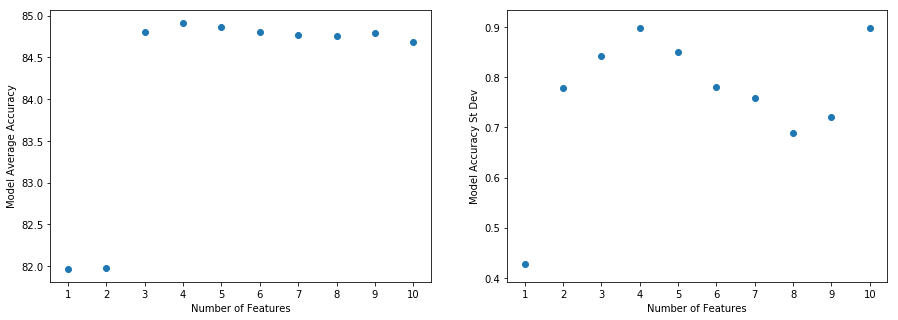

In [58]:
if (run_log_reg or run_all):
    n_list = list(range(1, len(choose_list) + 1))
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(n_list, max_accuracy_list_n)
    plt.xticks(n_list)
    plt.xlabel('Number of Features')
    plt.ylabel('Model Average Accuracy')

    plt.subplot(1, 2, 2)
    plt.scatter(n_list, max_accuracy_std_list_n)
    plt.xticks(n_list)
    plt.xlabel('Number of Features')
    plt.ylabel('Model Accuracy St Dev')

    plt.show()

The average accuracy of the models with 4 features represents the most accurate logistic regression model.

In [59]:
if (run_log_reg or run_all):
    print('Accuracy difference between 4 and 5 features:  ' + str(max_accuracy_list_n[3] - max_accuracy_list_n[4]))
    std_diff = max_accuracy_std_list_n[3] - max_accuracy_std_list_n[4]
    print('Accuracy standard deviation difference between 4 and 5 features:  ' + str(std_diff))

Accuracy difference between 4 and 5 features:  0.040069950069948845
Accuracy standard deviation difference between 4 and 5 features:  0.048620112578292796


The small reduction in the variability of accuracy for 5 features compared to 4 features does not justify choosing 5 features for the optimal model.  The importance of features is explored by examining the feature sets used for models with 1 to 4 features.  Feature set for 4-feature model is ['Age_Inv', 'IsActiveMember', ['NumOfProducts2', 'NumOfProducts3', 'NumOfProducts4'], 'EstimatedSalary'].

In [83]:
if (run_log_reg or run_all):
    print(max_accuracy_feat_list_n[:4])

[['NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'], ['Age_Inv', 'IsActiveMember'], ['Age_Inv', 'IsActiveMember', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'], ['EstimatedSalary', 'Age_Inv', 'IsActiveMember', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4']]


Given their consistent presence in the feature sets, it can be inferred that 'NumOfProducts', 'Age_Inv', and 'IsActiveMember' provide the most useful information in determining whether a customer will close their account or not.

## KNN

KNN is implemented with variation in the number of neighbors and in the method of weighting the votes from each neighbor.  The entire feature set is retained in favor of varying the number of neighbors and using different weighting.  The effect of variables that do not provide explanatory power will exist for all predictions, will be diluted by the effect of variables that do provide explanatory power, and will have less variation with increasing numbers of neighbors used.  This is further justified by the lack of information regarding feature importance given by KNN.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

if (run_knn or run_all):
    knn_weight_list = []
    knn_neighbors_list = []
    knn_accuracy_list = []
    knn_accuracy_std_list = []

    for k in [1, 5, 10, 25, 50]:
        for weighting in ['uniform', 'distance']:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weighting)

            # fit model and evaluate performance through cross-validation
            cv_score = cross_val_score(estimator=knn, X=X, y=Y, cv=10)
            model_avg_score = np.mean(cv_score)*100
            model_std = np.std(cv_score)*100

            # save model's weighting method, number of neighbors, average accuracy, and st dev of accuracy
            knn_weight_list.append(weighting)
            knn_neighbors_list.append(k)
            knn_accuracy_list.append(model_avg_score)
            knn_accuracy_std_list.append(model_std)

In [62]:
if (run_knn or run_all):
    df_data = np.vstack((np.array(knn_neighbors_list), np.array(knn_accuracy_list), 
           np.array(knn_accuracy_std_list))).T
    df_results_knn = pd.DataFrame(data=df_data, columns=['Neighbors', 'Model Average Accuracy', 'Model Accuracy St Dev'])
    df_results_knn['Weighting'] = knn_weight_list
    df_results_knn

The average accuracy and standard deviation of the accuracies (obtained through 10-fold cross-validation) of the model for each number of neighbors and weighting method are plotted.

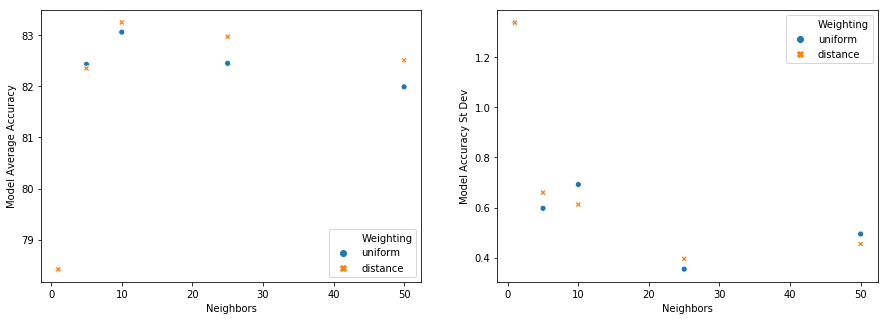

In [63]:
if (run_knn or run_all):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Neighbors', y='Model Average Accuracy', hue='Weighting', style='Weighting', data=df_results_knn)

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Neighbors', y='Model Accuracy St Dev', hue='Weighting', style='Weighting', data=df_results_knn)

    plt.show()

It is observed that uniform weighting equals or slightly outperforms distance weighting at lower numbers of neighbors but that distance weighting provides better accuracy at higher numbers of neighbors.  The greatest accuracy among the number of neighbors explored occurs at 10 neighbors with distance weighting.  It can also be observed that the standard deviation of the results obtained through 10-fold cross-validation decreases by half between 1 neighbor and 10 neighbors.  Therefore, 10 neighbors with distance weighting is selected as the optimal model for KNN.

## Decision Tree

A decision tree is implemented with variation in the maximum depth allowed in the decision trees.  The entire feature set is retained for the decision trees because decision trees perform inherent feature selection in the process of determining where to split.

In [64]:
from sklearn.tree import DecisionTreeClassifier

if (run_dec_tree or run_all):
    dt_depth_list = []
    dt_accuracy_list = []
    dt_accuracy_std_list = []

    for depth in range(1, 11):
        dtc = DecisionTreeClassifier(criterion='entropy', max_depth=depth)

        # fit model and evaluate performance through cross-validation
        cv_score = cross_val_score(estimator=dtc, X=X, y=Y, cv=10)
        model_avg_score = np.mean(cv_score)*100
        model_std = np.std(cv_score)*100

        # save model's max depth, average accuracy, and st dev of accuracy
        dt_depth_list.append(depth)
        dt_accuracy_list.append(model_avg_score)
        dt_accuracy_std_list.append(model_std)

In [65]:
if (run_dec_tree or run_all):
    df_data = np.vstack((np.array(dt_depth_list), np.array(dt_accuracy_list), 
           np.array(dt_accuracy_std_list))).T
    df_results_dt = pd.DataFrame(data=df_data, columns=['Max Depth', 'Model Average Accuracy', 'Model Accuracy St Dev'])
    df_results_dt

The average accuracy and standard deviation of the accuracies (obtained through 10-fold cross-validation) of the model for each maximum tree depth are plotted.

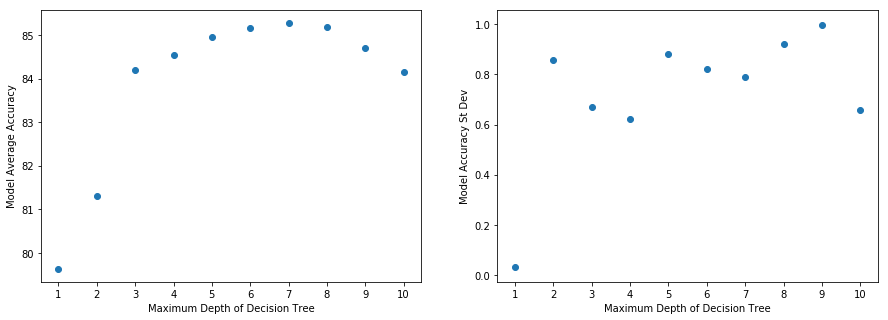

In [66]:
if (run_dec_tree or run_all):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(df_results_dt['Max Depth'], df_results_dt['Model Average Accuracy'])
    plt.xticks(df_results_dt['Max Depth'])
    plt.xlabel('Maximum Depth of Decision Tree')
    plt.ylabel('Model Average Accuracy')

    plt.subplot(1, 2, 2)
    plt.scatter(df_results_dt['Max Depth'], df_results_dt['Model Accuracy St Dev'])
    plt.xticks(df_results_dt['Max Depth'])
    plt.xlabel('Maximum Depth of Decision Tree')
    plt.ylabel('Model Accuracy St Dev')

    plt.show()

It is observed that the maximum accuracy for a decision tree occurs at a max depth of 7.  Additionally, the variation in the accuracy is at a relative minimum at a max depth of 7.  Therefore, a decision tree with a max depth of 7 is chosen as the optimal decision tree model.  With an optimal model chosen, the feature importances are inspected.

In [84]:
if (run_dec_tree or run_all):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7)
    dtc.fit(X, Y)
    df_feat_imp_dt = pd.DataFrame(data=dtc.feature_importances_, index=X.columns.values)
    print(df_feat_imp_dt.sort_values(by=[0], ascending=False))

                          0
Age_Inv            0.388116
NumOfProducts_2    0.211425
Balance            0.122124
NumOfProducts_3    0.075756
IsActiveMember     0.074212
Geography_Germany  0.046646
EstimatedSalary    0.033601
CreditScore        0.020162
NumOfProducts_4    0.010215
IsMale             0.009003
Tenure             0.008742
HasCrCard          0.000000
Geography_Spain    0.000000


Similarly to logistic regression, it is observed that characteristics associated with the 'Age_Inv', 'NumOfProducts', and 'IsActiveMember' variables are important in the construction of the decision tree.

## Random Forest

A random forest is implemented with variation in the maximum depth allowed in the decision trees and in the number of trees in the forest.  The entire feature set is retained for the random forest because decision trees perform inherent feature selection in the process of determining where to split.

In [68]:
from sklearn.ensemble import RandomForestClassifier

if (run_rand_for or run_all):
    rf_num_tree_list = []
    rf_max_depth_list = []
    rf_accuracy_list = []
    rf_accuracy_std_list = []

    for num_trees in [10, 100, 500, 1000]:
        # included for progress tracking during extended runtime of cell
        print('Number of trees:  ' + str(num_trees))

        for max_depth1 in [2, 3, 4, 5]:
            # included for progress tracking during extended runtime of cell
            print('Max depth:  ' + str(max_depth1))

            rfc = RandomForestClassifier(criterion='entropy', n_estimators=num_trees, max_depth=max_depth1)

            # fit model and evaluate performance through cross-validation
            cv_score = cross_val_score(estimator=rfc, X=X, y=Y, cv=10)
            model_avg_score = np.mean(cv_score)*100
            model_std = np.std(cv_score)*100

            # save model's number of trees, max depth, average accuracy, and st dev of accuracy
            rf_num_tree_list.append(num_trees)
            rf_max_depth_list.append(max_depth1)
            rf_accuracy_list.append(model_avg_score)
            rf_accuracy_std_list.append(model_std)

Number of trees:  10
Max depth:  2
Max depth:  3
Max depth:  4
Max depth:  5
Number of trees:  100
Max depth:  2
Max depth:  3
Max depth:  4
Max depth:  5
Number of trees:  500
Max depth:  2
Max depth:  3
Max depth:  4
Max depth:  5
Number of trees:  1000
Max depth:  2
Max depth:  3
Max depth:  4
Max depth:  5


In [69]:
if (run_rand_for or run_all):
    df_data = np.vstack((np.array(rf_num_tree_list), np.array(rf_max_depth_list), 
           np.array(rf_accuracy_list), np.array(rf_accuracy_std_list))).T
    df_results_rf = pd.DataFrame(data=df_data, columns=['Number of Trees', 'Max Depth', 'Model Average Accuracy', 
                                                        'Model Accuracy St Dev'])
    df_results_rf

The average accuracy and standard deviation of the accuracies (obtained through 10-fold cross-validation) of the model for each combination of number of trees and maximum depth of trees are plotted.

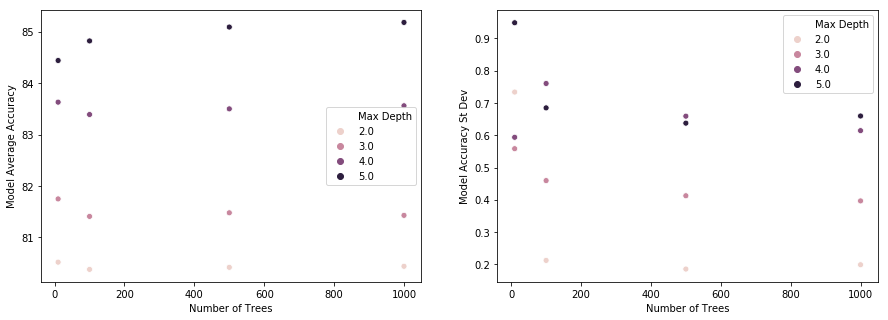

In [70]:
if (run_rand_for or run_all):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Number of Trees', y='Model Average Accuracy', hue='Max Depth', data=df_results_rf)

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Number of Trees', y='Model Accuracy St Dev', hue='Max Depth', data=df_results_rf)

    plt.show()

It is observed that accuracy increases with a greater max depth for the component trees in the random forest.  There is a varied effect of increasing the number of trees in the model for differing max depths.  Inspection of these plots shows that the best performance is for a maximum tree depth of 5 and that there is marginal improvement at higher numbers of trees.  Therefore, a random forest with a maximum depth of 5 and 100 component trees is chosen as the optimal model for the random forest.  With an optimal model chosen, the feature importances are inspected.

In [85]:
if (run_rand_for or run_all):
    rfc = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=5)
    rfc.fit(X, Y)
    df_feat_imp_rf = pd.DataFrame(data=rfc.feature_importances_, index=X.columns.values)
    print(df_feat_imp_rf.sort_values(by=[0], ascending=False))

                          0
Age_Inv            0.366690
NumOfProducts_2    0.245722
NumOfProducts_3    0.119790
Geography_Germany  0.065989
IsActiveMember     0.063431
Balance            0.060130
NumOfProducts_4    0.028124
IsMale             0.016584
CreditScore        0.015840
EstimatedSalary    0.010851
Tenure             0.004020
Geography_Spain    0.001973
HasCrCard          0.000856


Similarly to logistic regression, it is observed that characteristics associated with the 'Age_Inv', 'NumOfProducts', and 'IsActiveMember' variables are important in the construction of the decision tree.

## Support Vector Classifier

A support vector classifier is implemented with the entire feature set.  There are not so many features that it is computationally-prohibitive so they are all retained.

In [72]:
from sklearn.svm import SVC

if (run_svc or run_all):
    svc_model = SVC(gamma='auto')

    cv_score = cross_val_score(estimator=svc_model, X=X, y=Y, cv=10)
    svc_accuracy = np.mean(cv_score)*100
    svc_accuracy_std = np.std(cv_score)*100

    print('Model Average Accuracy:  ' + str(svc_accuracy) + '%.')
    print('Model Accuracy St Dev:  ' + str(svc_accuracy_std) + '%.')

Model Average Accuracy:  81.96996927996928%.
Model Accuracy St Dev:  0.4277511689224928%.


## Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

if (run_grad_boost or run_all):
    gb_num_estimators_list = []
    gb_learn_rate_list = []
    gb_accuracy_list = []
    gb_accuracy_std_list = []

    for num_estimators in [10, 100, 200, 500]:
        # included for progress tracking during extended runtime of cell
        print('Number of estimators:  ' + str(num_estimators))

        for learn_rate in [0.1, 0.2, 0.3, 0.4, 0.5]:
            # included for progress tracking during extended runtime of cell
            print('Learning rate:  ' + str(learn_rate))

            gbc = GradientBoostingClassifier(n_estimators=num_estimators, learning_rate=learn_rate)

            # fit model and evaluate performance through cross-validation
            cv_score = cross_val_score(estimator=gbc, X=X, y=Y, cv=10)
            model_avg_score = np.mean(cv_score)*100
            model_std = np.std(cv_score)*100

            # save model's number of estimators, learning rate, average accuracy, and st dev of accuracy
            gb_num_estimators_list.append(num_estimators)
            gb_learn_rate_list.append(learn_rate)
            gb_accuracy_list.append(model_avg_score)
            gb_accuracy_std_list.append(model_std)

Number of estimators:  10
Learning rate:  0.1
Learning rate:  0.2
Learning rate:  0.3
Learning rate:  0.4
Learning rate:  0.5
Number of estimators:  100
Learning rate:  0.1
Learning rate:  0.2
Learning rate:  0.3
Learning rate:  0.4
Learning rate:  0.5
Number of estimators:  200
Learning rate:  0.1
Learning rate:  0.2
Learning rate:  0.3
Learning rate:  0.4
Learning rate:  0.5
Number of estimators:  500
Learning rate:  0.1
Learning rate:  0.2
Learning rate:  0.3
Learning rate:  0.4
Learning rate:  0.5


In [74]:
if (run_grad_boost or run_all):
    df_data = np.vstack((np.array(gb_num_estimators_list), np.array(gb_learn_rate_list), 
           np.array(gb_accuracy_list), np.array(gb_accuracy_std_list))).T
    df_results_gb = pd.DataFrame(data=df_data, columns=['Number of Estimators', 'Learning Rate', 
                                                        'Model Average Accuracy', 'Model Accuracy St Dev'])
    df_results_gb

The average accuracy and standard deviation of the accuracies (obtained through 10-fold cross-validation) of the model for each combination of number of estimators and learning rate are plotted.

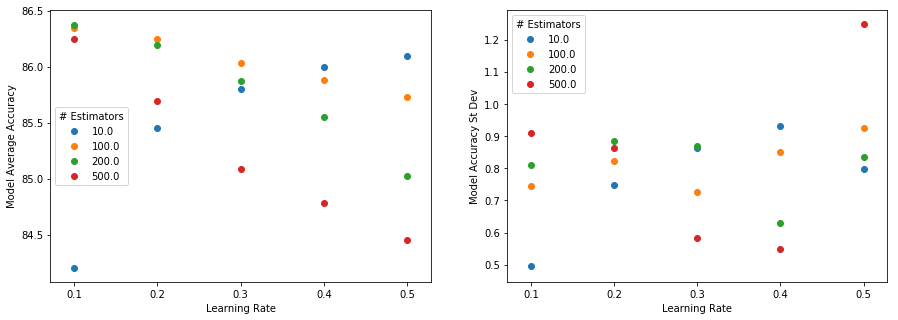

In [86]:
if (run_grad_boost or run_all):
    legend_list = []
    plt.figure(figsize=(15, 5)), plt.subplot(1, 2, 1)
    for num_est in df_results_gb['Number of Estimators'].unique():
        df_select = df_results_gb[df_results_gb['Number of Estimators'] == num_est]
        plt.scatter(df_select['Learning Rate'], df_select['Model Average Accuracy'])
        legend_list.append(num_est)
    plt.legend(legend_list, title='# Estimators'), plt.xlabel('Learning Rate'), plt.ylabel('Model Average Accuracy')    
    plt.subplot(1, 2, 2)
    for num_est in df_results_gb['Number of Estimators'].unique():
        df_select = df_results_gb[df_results_gb['Number of Estimators'] == num_est]
        plt.scatter(df_select['Learning Rate'], df_select['Model Accuracy St Dev'])
        legend_list.append(num_est)
    plt.legend(legend_list, title='# Estimators'), plt.xlabel('Learning Rate'), plt.ylabel('Model Accuracy St Dev'), plt.show()

It is observed that the best accuracies are obtained at a learning rate of 0.1.  The number of estimators has a small impact on the accuracy for numbers of estimators of 100, 200, and 500 at this learning rate.  The model with 200 estimators demonstrates the best accuracy at this learning rate and is closely followed by the model with 100 estimators.  The differences between the average accuracies and accuracy standard deviations are compared.

In [76]:
if (run_grad_boost or run_all):
    accuracy_diff_gb = df_results_gb.iloc[10]['Model Average Accuracy'] - df_results_gb.iloc[5]['Model Average Accuracy']
    accuracy_diff_std_gb = df_results_gb.iloc[10]['Model Accuracy St Dev'] - df_results_gb.iloc[5]['Model Accuracy St Dev']

    print('Difference between accuracies:  ' + str(accuracy_diff_gb))
    print('Difference between accuracy standard deviations:  ' + str(accuracy_diff_std_gb))

Difference between accuracies:  0.01996003996003992
Difference between accuracy standard deviations:  0.06465289848289957


With the difference between the accuracy standard deviations being a few times the size of the difference between the average accuracies, the model with 100 estimators and a learning rate of 0.1 is chosen since it will provide a more consistent prediction with almost the same accuracy as the model with 200 estimators.

## Model performance

After optimal model parameters have been selected for each model, the data set is split into train and test groups so that models of each type with the optimal parameters can be fitted and tested.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

log_reg_cfm_list = [0, 0, 0, 0]
knn_cfm_list = log_reg_cfm_list.copy()
dt_cfm_list = log_reg_cfm_list.copy()
rf_cfm_list = log_reg_cfm_list.copy()
svc_cfm_list = log_reg_cfm_list.copy()
gb_cfm_list = log_reg_cfm_list.copy()

for rand_state in [256, 205, 504, 281, 865]:
    
    # split data into test and training sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=rand_state + 303)

    # create logistic regression model
    log_reg_eval = LogisticRegression(random_state=20, solver='lbfgs')
    X_train_log_reg_eval = X_train[['Age_Inv', 'IsActiveMember', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 
                                   'EstimatedSalary']]
    X_test_log_reg_eval = X_test[['Age_Inv', 'IsActiveMember', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 
                                   'EstimatedSalary']]
    log_reg_eval.fit(X_train_log_reg_eval, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, log_reg_eval.predict(X_test_log_reg_eval))
    log_reg_cfm_list[0] += cfm[0, 0]
    log_reg_cfm_list[1] += cfm[0, 1]
    log_reg_cfm_list[2] += cfm[1, 0]
    log_reg_cfm_list[3] += cfm[1, 1]

    # create KNN model
    knn_eval = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_eval.fit(X_train, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, knn_eval.predict(X_test))
    knn_cfm_list[0] += cfm[0, 0]
    knn_cfm_list[1] += cfm[0, 1]
    knn_cfm_list[2] += cfm[1, 0]
    knn_cfm_list[3] += cfm[1, 1]

    # create decision tree model
    dt_eval = DecisionTreeClassifier(criterion='entropy', max_depth=7)
    dt_eval.fit(X_train, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, dt_eval.predict(X_test))
    dt_cfm_list[0] += cfm[0, 0]
    dt_cfm_list[1] += cfm[0, 1]
    dt_cfm_list[2] += cfm[1, 0]
    dt_cfm_list[3] += cfm[1, 1]

    # create random forest model
    rf_eval = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=5)
    rf_eval.fit(X_train, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, rf_eval.predict(X_test))
    rf_cfm_list[0] += cfm[0, 0]
    rf_cfm_list[1] += cfm[0, 1]
    rf_cfm_list[2] += cfm[1, 0]
    rf_cfm_list[3] += cfm[1, 1]

    # create SVC model
    svc_eval = SVC(gamma='auto')
    svc_eval.fit(X_train, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, svc_eval.predict(X_test))
    svc_cfm_list[0] += cfm[0, 0]
    svc_cfm_list[1] += cfm[0, 1]
    svc_cfm_list[2] += cfm[1, 0]
    svc_cfm_list[3] += cfm[1, 1]

    # create gradient boosting model
    gb_eval = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
    gb_eval.fit(X_train, Y_train)
    
    # create confusion matrix and save entries
    cfm = confusion_matrix(Y_test, gb_eval.predict(X_test))
    gb_cfm_list[0] += cfm[0, 0]
    gb_cfm_list[1] += cfm[0, 1]
    gb_cfm_list[2] += cfm[1, 0]
    gb_cfm_list[3] += cfm[1, 1]

In [78]:
total_preds = sum(log_reg_cfm_list)

model_perf_df = pd.DataFrame(data=np.vstack((log_reg_cfm_list, knn_cfm_list, dt_cfm_list, rf_cfm_list, 
                                             svc_cfm_list, gb_cfm_list))/total_preds*100, 
                             columns=['Both 0', 'True 0, Pred 1', 'True 1, Pred 0', 'Both 1'], 
                            index=['Log Reg', 'KNN', 'Decision Tree', 'Random Forest', 'SVC', 'Grad. Boost'])
model_perf_df

,Both 0,"True 0, Pred 1","True 1, Pred 0",Both 1
Log Reg,78.08,1.67,13.28,6.97
KNN,75.67,4.08,12.75,7.50
Decision Tree,76.35,3.40,11.01,9.24
Random Forest,78.97,0.78,14.12,6.13
SVC,79.36,0.39,17.53,2.72
Grad. Boost,77.09,2.66,10.55,9.70


Performance characteristics for a classifier such as accuracy, sensitivity, and specificity are calculated.

In [79]:
model_perf_df['Accuracy'] = model_perf_df['Both 0'] + model_perf_df['Both 1']
model_perf_df['Sensitivity'] = model_perf_df['Both 1']/(model_perf_df['Both 1'] + model_perf_df['True 1, Pred 0'])*100
model_perf_df['Specificity'] = model_perf_df['Both 0']/(model_perf_df['Both 0'] + model_perf_df['True 0, Pred 1'])*100
model_perf_df

,Both 0,"True 0, Pred 1","True 1, Pred 0",Both 1,Accuracy,Sensitivity,Specificity
Log Reg,78.08,1.67,13.28,6.97,85.05,34.419753,97.905956
KNN,75.67,4.08,12.75,7.50,83.17,37.037037,94.884013
Decision Tree,76.35,3.40,11.01,9.24,85.59,45.629630,95.736677
Random Forest,78.97,0.78,14.12,6.13,85.10,30.271605,99.021944
SVC,79.36,0.39,17.53,2.72,82.08,13.432099,99.510972
Grad. Boost,77.09,2.66,10.55,9.70,86.79,47.901235,96.664577


In [80]:
print('The models in order of accuracy are:')
print(model_perf_df['Accuracy'].sort_values(ascending=False))

The models in order of accuracy are:
Grad. Boost      86.79
Decision Tree    85.59
Random Forest    85.10
Log Reg          85.05
KNN              83.17
SVC              82.08
Name: Accuracy, dtype: float64


In [81]:
print('The models in order of sensitivity are:')
print(model_perf_df['Sensitivity'].sort_values(ascending=False))

The models in order of sensitivity are:
Grad. Boost      47.901235
Decision Tree    45.629630
KNN              37.037037
Log Reg          34.419753
Random Forest    30.271605
SVC              13.432099
Name: Sensitivity, dtype: float64


In [82]:
print('The models in order of specificity are:')
print(model_perf_df['Specificity'].sort_values(ascending=False))

The models in order of specificity are:
SVC              99.510972
Random Forest    99.021944
Log Reg          97.905956
Grad. Boost      96.664577
Decision Tree    95.736677
KNN              94.884013
Name: Specificity, dtype: float64


For the purpose of identifying which customers are likely to close their accounts, the accuracy and sensitivity are the most important measures of a model's performance.  Specificity is not as important in this case because a lack of it might lead the company to engage a customer that was not likely to leave anyway.  The potential lack of efficiency of resource utilization in engaging with a customer unnecessarily is not necessarily a bad outcome when compared to not engaging with a customer that is susceptible to close their account.  The specificity is additionally diminished in importance due to the imbalance of the original dataset where 79.63% of customers did not close their accounts.  The gradient boosting and decision tree models perform the best in the areas of accuracy and sensitivity.  The accuracy of the various models is much more closely grouped on account of their collective ability to identify customers that do not close their accounts well, but the gradient boosting and decision tree models perform much better than the rest in identifying customers who do close their accounts.  Despite being the best models, the gradient boosting and decision tree models still identify fewer than 50% of customers who close their accounts correctly.  This is likely related to the lack of strong correlation between any of the explanatory variables and the target variable of whether the customer closed their account.  In a theoretical situation where more data could be obtained, it could be worthwhile to collect data on more factors associated with the customers and their experience with the bank in order to create a better model with increased ability to predict whether a customer will close their account.